pandas are built on numpy and seaborn is built on matplotlib

In [17]:
#import all necessary libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

#load the dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
#convert string dtype to list dtype
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

install and import seaborn

In [18]:
 import seaborn as sns

In [19]:
#only get the data analyst jobs in the us
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

#drop all the nan values from the salary_year_avg col
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])


In [20]:
df_DA_US=df_DA_US.explode('job_skills')

In [21]:
#well access the job_skills col and apply the groupby method (all similar jobs grouped together eg: all software jobs together alll teaching jobs together
# all banking jobs together, etc..
# then accessing the salary_year_avg of each group and applying 2 methods on it count and median)

df_DA_US_group=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])


In [22]:
#now we need 2 dataframes
#1st df with the top 10 highest salaries
#2nd df with the top 10 skills wjich have higher count


#create the top pay salary df
#top 10 skills based on median salaries
#jiska median salary is high uska skill will be shown first

df_DA_top_pay=df_DA_US_group.sort_values(by='median',ascending=False).head(10)
df_DA_top_pay

#2nd df is skills with highest count with the highest median salaries
#we sort skills according to the count col and then again we have to sort it according to the median col
#first find thetop 10 most common skills and then for those skills find which one pays the best
df_DA_skills=df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


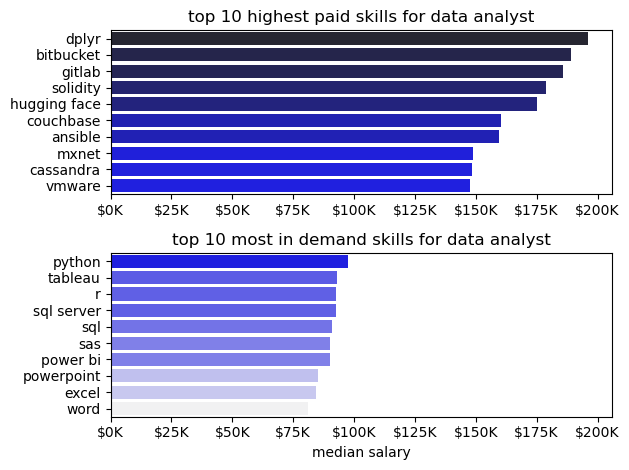

In [28]:
#now lets plot this
#since we need to plot 2 plots we use subplots
#2 figures in 1 col
fig, ax=plt.subplots(2,1)

#df_DA_top_pay.plot(kind='barh',y='median' ,ax=ax[0],legend=False)

#now well plot this using seaborn, palette='dark:b_r' here b_r means reverse the dark colors of blue
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median',palette='dark:b_r')
ax[0].set_title('top 10 highest paid skills for data analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()
#modify the values int the x axis
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))

#df_DA_skills.plot(kind='barh',y='median',ax=ax[1], legend=False)

#now well plot this using seaborn
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1],hue='median',palette='light:b')
ax[1].set_title('top 10 most in demand skills for data analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('median salary')
#modify the x axis set the 2nd graph axis acc to the first one
ax[1].set_xlim(ax[0].get_xlim())
#modify the values in the x axis
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))

#to avoid overlap
fig.tight_layout()
plt.show()

now well look at histogram creation through seaborn

Text(9.444444444444445, 0.5, 'no of jobs')

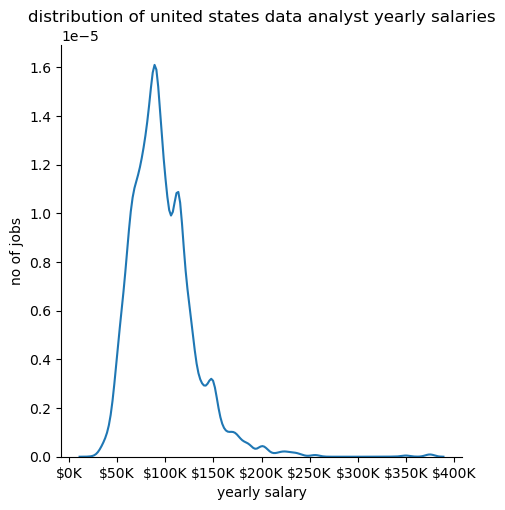

In [31]:
#lets plot the histogram using seaborn displot function , used to plot smoother curves
sns.displot(df_DA_US['salary_year_avg'],kind='kde')

#we will also format the x axis
#first get the current axis
ax=plt.gca()

#we want to make our x axis values(labels) look better
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('distribution of united states data analyst yearly salaries')
plt.xlabel('yearly salary')
plt.ylabel('no of jobs')

now well plot boxplot using seaborn

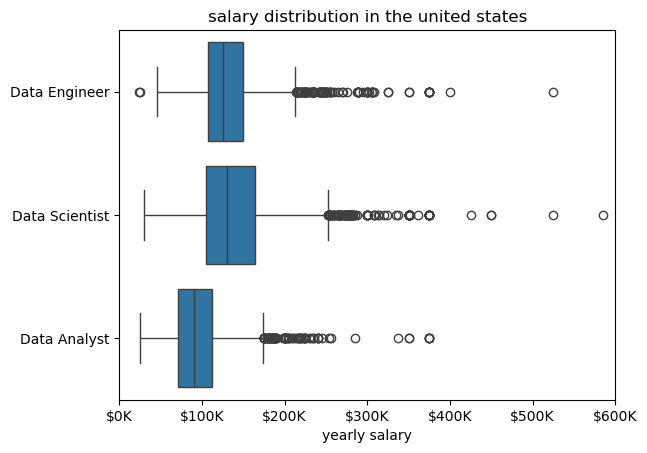

In [34]:
#what if we need to plot the salaries of data scientist data analyst and data engineer
#so define the three job titiles in a list called job_titles
#labels here (job_titles) is just the name of data analyst data scientist and data enfineer
job_titles=['Data Analyst','Data Scientist','Data Engineer']

#filter the data to appropriate job_titles
#so create  a new df which only shows jobsin job_titles and that job present in the us
df_US=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()

#now in our df_US dataframe when we access the salary_year_avg there might be NaN values
#drop it
df_US=df_US.dropna(subset=['salary_year_avg'])

#now define job_list variable
#we loop through the job_titles list using for loop and an iterator job_title
#we access the job_title_short col from our df_US dataframe and if the col == job_title then access the salary_year_avg col and give the values (give me the salary_year_avg information)

job_list=[df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

#now plot using seaborn
sns.boxplot(data=df_US, x='salary_year_avg',y='job_title_short')
plt.title('salary distribution in the united states')
plt.xlabel('yearly salary')
plt.ylabel('')

#we also want to modify the x axis
#get the access attribute first
ax=plt.gca()
#now modify
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
#i just want the x value to be from 0-600000
plt.xlim(0,600000)
plt.show()